In [301]:
## Observation Analysis
## 1. The correlation between mouse weight and the average tumor volume is 0.84 which is a strong positive correlation. 
## 2. Capomulin and Ramicane treatments are better at reducing tumor sizes in mice, according to the graph called "# of Timepoints vs Drug Regiment". 
## 3. When the Capomulin regimen was used on Mouse I509, it greatly reduced the tumor size from its peak of tumor size 48 mm^3 to 41mm^3 in the span of 40 days. 

In [302]:
!pip install matplotlib

In [303]:
import matplotlib

In [304]:
!pip install scipy

In [305]:
!pip install numpy

In [306]:
import scipy

In [307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [308]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [309]:
# Combine the data into a single DataFrame
combined_data_df = study_results.merge(mouse_metadata, how = 'left', on = "Mouse ID", sort = False)

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [310]:
# Checking the number of mice.
mice_count = combined_data_df["Mouse ID"].nunique()
mice_count

249

In [311]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [312]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [313]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice_ID)==False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [314]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = cleaned_df["Mouse ID"].nunique()
cleaned_mice

248

In [315]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":var, "Tumor Volume Std. Dev.":std, "Tumor Volume Std. Err.":sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [316]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0.5, 1.0, '# of Timepoints vs Drug Regiment (pandas)')

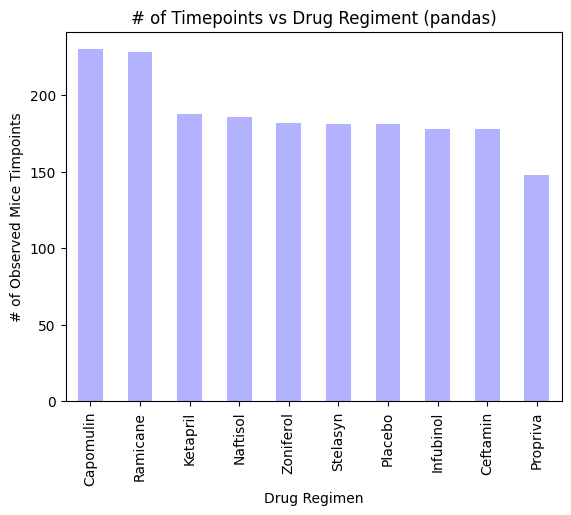

In [317]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mice_points.plot.bar(color='b', alpha = 0.3)
plt.ylabel("# of Observed Mice Timpoints")
plt.title('# of Timepoints vs Drug Regiment (pandas)')

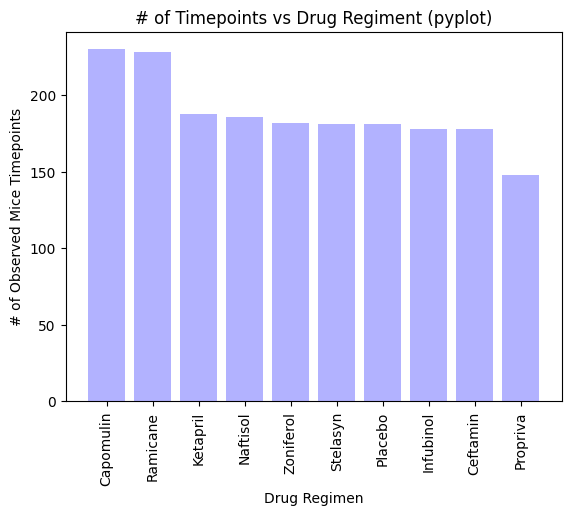

In [318]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_points.index.values
y_axis = mice_points.values
plt.bar(x_axis, y_axis, color='b', alpha=0.3)
plt.title('# of Timepoints vs Drug Regiment (pyplot)')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.xticks(rotation="vertical")
plt.show()


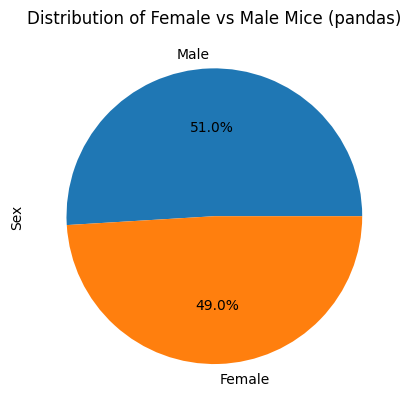

In [319]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_data = cleaned_df["Sex"].value_counts()
mice_gender_data.plot.pie(autopct= "%1.1f%%")
plt.title('Distribution of Female vs Male Mice (pandas)')
plt.ylabel('Sex')
plt.show()

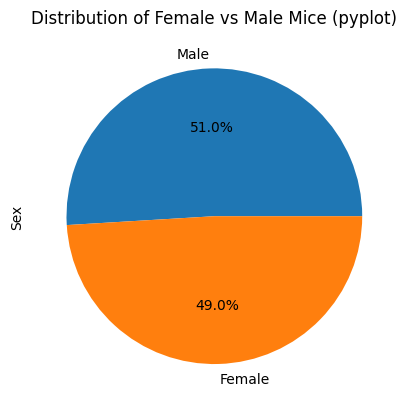

In [320]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = mice_gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Distribution of Female vs Male Mice (pyplot)')
plt.ylabel('Sex')
plt.show()

In [321]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)
    
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

#Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]


Capomulin
Ramicane
Infubinol
Ceftamin


In [322]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data_df[combined_data_df["Drug Regimen"].isin(drug_list)]
drugs.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [323]:
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. treatment = 0

for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"For {drug} treatments, the lower quartile is: {lowerq} and the upper quartile is {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} and values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
    Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
    Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
    Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]
    
    # Determine outliers using upper and lower bounds
    

For Capomulin treatments, the lower quartile is: 32.38 and the upper quartile is 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 and values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
For Ramicane treatments, the lower quartile is: 31.56 and the upper quartile is 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 and values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
For Infubinol treatments, the lower quartile is: 54.05 and the upper quartile is 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 and values above 82.75 could be Infubinol outliers.
------------------------------------------------------------
For Ceftamin treatments, the lower quartile is: 48.72 and the upper quartile is 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 and values abo

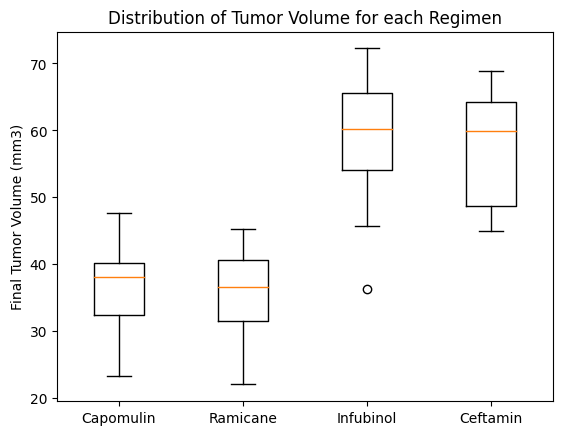

In [324]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for each Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

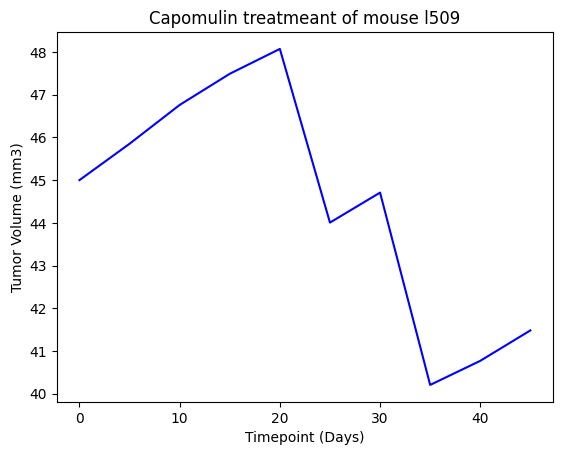

In [325]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_plot_df.head()
x_axis = line_plot_df["Timepoint"]
tumor_size = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [326]:
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [327]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_vol_Capomulin =Capomulin_df.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()
avg_vol_Capomulin
# make a dataframe using reset index
avg_vol_Capomulin_df = avg_vol_Capomulin.reset_index()
avg_vol_Capomulin_df

,Mouse ID,Tumor Volume (mm3)
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344
5,i557,44.805810
6,i738,39.141053
7,j119,44.465236
8,j246,43.216925
9,l509,44.434474


In [328]:
# average for weight
avg_weight_Capomulin =Capomulin_df.groupby(['Mouse ID'])["Weight (g)"].mean()
avg_weight_Capomulin
avg_weight_Capomulin_df = avg_weight_Capomulin.reset_index()
avg_weight_Capomulin_df

,Mouse ID,Weight (g)
0,b128,22.0
1,b742,21.0
2,f966,17.0
3,g288,19.0
4,g316,22.0
5,i557,24.0
6,i738,20.0
7,j119,23.0
8,j246,21.0
9,l509,21.0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

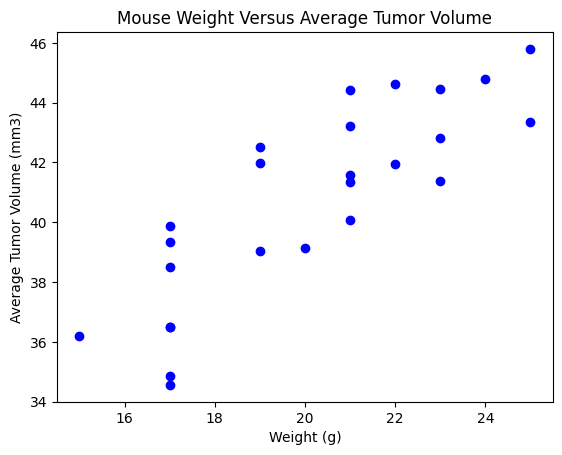

In [329]:
fig1, ax1 = plt.subplots()
plt.scatter(avg_weight_Capomulin_df['Weight (g)'], avg_vol_Capomulin_df['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

In [330]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight_Capomulin_df['Weight (g)'],avg_vol_Capomulin_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [331]:
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avg_weight_Capomulin_df["Weight (g)"], avg_vol_Capomulin_df["Tumor Volume (mm3)"])
regress_values= avg_weight_Capomulin_df["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

The r-squared is: 0.709


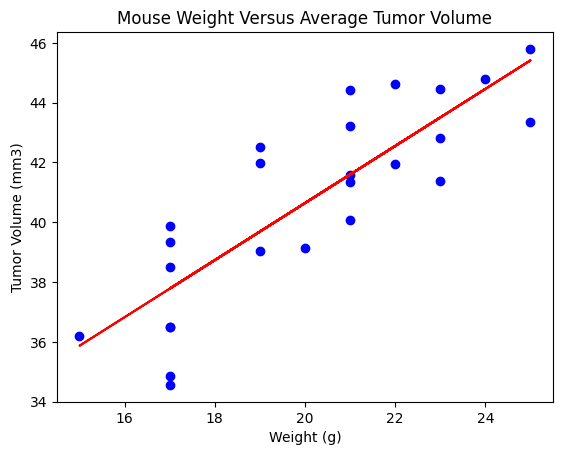

In [332]:
plt.scatter(avg_weight_Capomulin_df["Weight (g)"], avg_vol_Capomulin_df["Tumor Volume (mm3)"],color='b')
plt.plot(avg_weight_Capomulin_df["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse Weight Versus Average Tumor Volume')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()